Step 1: Data Preprocessing

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV, cross_val_score
import joblib

In [ ]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/diabetes_dataset.csv')

In [ ]:
data.head()

,Age,Gender,BMI,Blood Glucose (mg/dL),HbA1c (%),Systolic BP (mmHg),Diastolic BP (mmHg),Family History of Diabetes,Physical Activity Level,Region,Smoking Status,Alcohol Consumption,Fasting Insulin (µU/mL),Diabetes Diagnosis
0,51,0,23.019342,107,5.008657,99,68,3,1,3,2,0,56.888255,0
1,72,1,18.712010,164,5.534900,92,86,7,2,0,1,0,69.350760,1
2,69,0,32.241335,194,5.320045,101,76,6,2,0,1,1,73.637145,1
3,68,0,26.365137,102,4.739367,139,76,6,0,3,0,1,84.938232,0
4,42,0,21.011663,94,4.515798,100,67,4,3,2,2,2,30.104654,1


In [ ]:
data.shape #getting to know about rows and columns we're dealing with - 348 rows , 14 columns

(1000, 14)

In [ ]:
data.columns #learning about the columns

Index(['Age', 'Gender', 'BMI', 'Blood Glucose (mg/dL)', 'HbA1c (%)',
       'Systolic BP (mmHg)', 'Diastolic BP (mmHg)',
       'Family History of Diabetes', 'Physical Activity Level', 'Region',
       'Smoking Status', 'Alcohol Consumption', 'Fasting Insulin (µU/mL)',
       'Diabetes Diagnosis'],
      dtype='object')

In [ ]:
data.dtypes #knowledge of data type helps for computation

Age                             int64
Gender                          int64
BMI                           float64
Blood Glucose (mg/dL)           int64
HbA1c (%)                     float64
Systolic BP (mmHg)              int64
Diastolic BP (mmHg)             int64
Family History of Diabetes      int64
Physical Activity Level         int64
Region                          int64
Smoking Status                  int64
Alcohol Consumption             int64
Fasting Insulin (µU/mL)       float64
Diabetes Diagnosis              int64
dtype: object

In [ ]:
data.info() #Print a concise summary of a Data. This method prints information about a Data including the index dtype and columns, non-null values and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         1000 non-null   int64  
 1   Gender                      1000 non-null   int64  
 2   BMI                         1000 non-null   float64
 3   Blood Glucose (mg/dL)       1000 non-null   int64  
 4   HbA1c (%)                   1000 non-null   float64
 5   Systolic BP (mmHg)          1000 non-null   int64  
 6   Diastolic BP (mmHg)         1000 non-null   int64  
 7   Family History of Diabetes  1000 non-null   int64  
 8   Physical Activity Level     1000 non-null   int64  
 9   Region                      1000 non-null   int64  
 10  Smoking Status              1000 non-null   int64  
 11  Alcohol Consumption         1000 non-null   int64  
 12  Fasting Insulin (µU/mL)     1000 non-null   float64
 13  Diabetes Diagnosis          1000 n

In [ ]:
data.describe() #helps us to understand how data has been spread across the table.
# count :- the number of NoN-empty rows in a feature.
# mean :- mean value of that feature.
# std :- Standard Deviation Value of that feature.
# min :- minimum value of that feature.
# max :- maximum value of that feature.
# 25%, 50%, and 75% are the percentile/quartile of each features.

,Age,Gender,BMI,Blood Glucose (mg/dL),HbA1c (%),Systolic BP (mmHg),Diastolic BP (mmHg),Family History of Diabetes,Physical Activity Level,Region,Smoking Status,Alcohol Consumption,Fasting Insulin (µU/mL),Diabetes Diagnosis
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,48.707000,0.517000,26.784103,133.885000,5.484759,114.509000,74.918000,4.427000,1.493000,2.021000,0.955000,0.978000,49.010312,0.50000
std,17.853905,0.499961,4.820020,36.775919,0.860229,14.277106,8.550578,2.070014,1.123928,1.422879,0.803505,0.812512,29.187159,0.50025
min,20.000000,0.000000,18.017489,70.000000,4.000961,90.000000,60.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.021172,0.00000
25%,33.000000,0.000000,22.776740,103.000000,4.731703,103.000000,68.000000,3.000000,0.000000,1.000000,0.000000,0.000000,23.156941,0.00000
50%,49.000000,1.000000,27.023567,133.500000,5.484664,114.000000,75.000000,4.000000,2.000000,2.000000,1.000000,1.000000,48.072165,0.50000
75%,65.000000,1.000000,30.873061,165.000000,6.239640,127.000000,83.000000,6.000000,2.000000,3.000000,2.000000,2.000000,75.918676,1.00000
max,79.000000,1.000000,34.984258,199.000000,6.998152,139.000000,89.000000,10.000000,3.000000,4.000000,2.000000,2.000000,99.837566,1.00000


In [ ]:
# Assuming 'data' is your DataFrame
columns_to_check = ['Age', 'BMI', 'Blood Glucose (mg/dL)']

# Check for zeros in the specified columns
zeros_in_columns = data[columns_to_check].isin([0]).any()

print(zeros_in_columns)

Age                      False
BMI                      False
Blood Glucose (mg/dL)    False
dtype: bool


Age                      False
BMI                      False
Blood Glucose (mg/dL)    False
dtype: bool


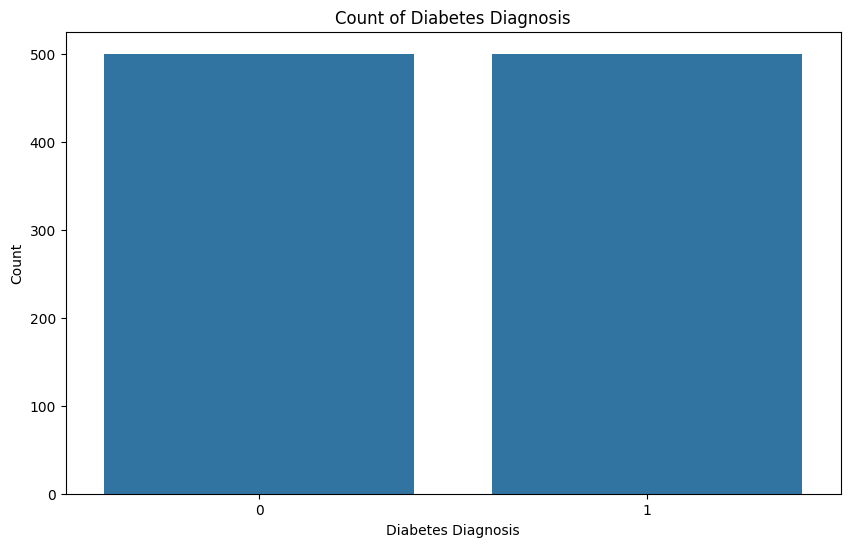

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
columns_to_check = ['Age', 'BMI', 'Blood Glucose (mg/dL)']

# Check for zeros in the specified columns
zeros_in_columns = data[columns_to_check].isin([0]).any()

print(zeros_in_columns)

# Add countplot
plt.figure(figsize=(10, 6))
sns.countplot(x='Diabetes Diagnosis', data=data)

# Add labels and title
plt.xlabel('Diabetes Diagnosis')
plt.ylabel('Count')
plt.title('Count of Diabetes Diagnosis')

# Display the plot
plt.show()

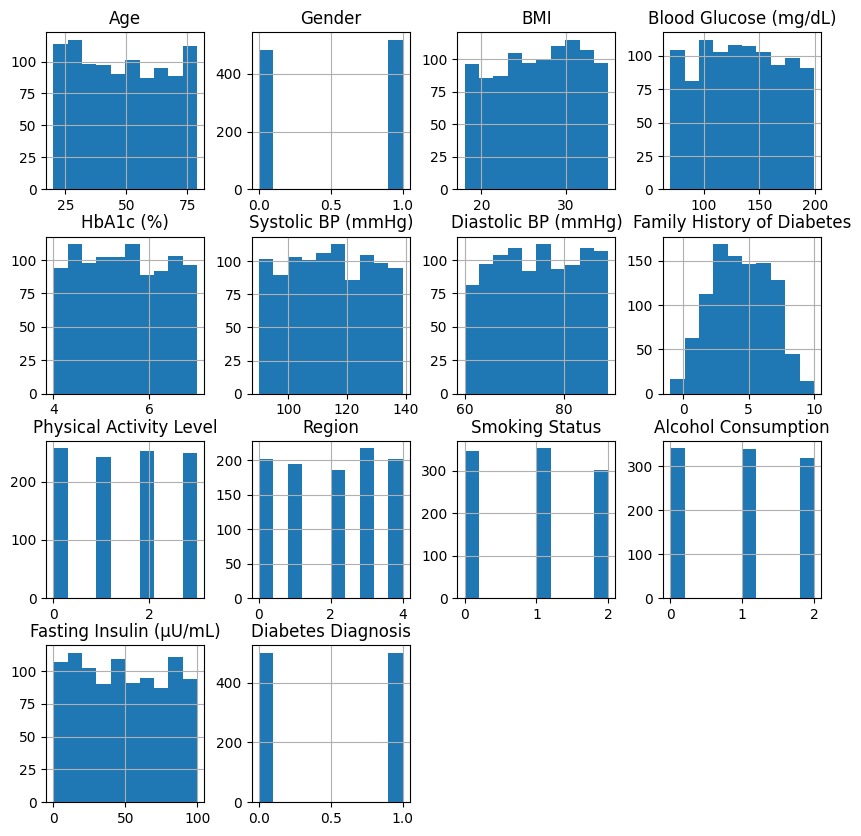

In [ ]:
#histogram for each  feature
data.hist(bins=10,figsize=(10,10))
plt.show()

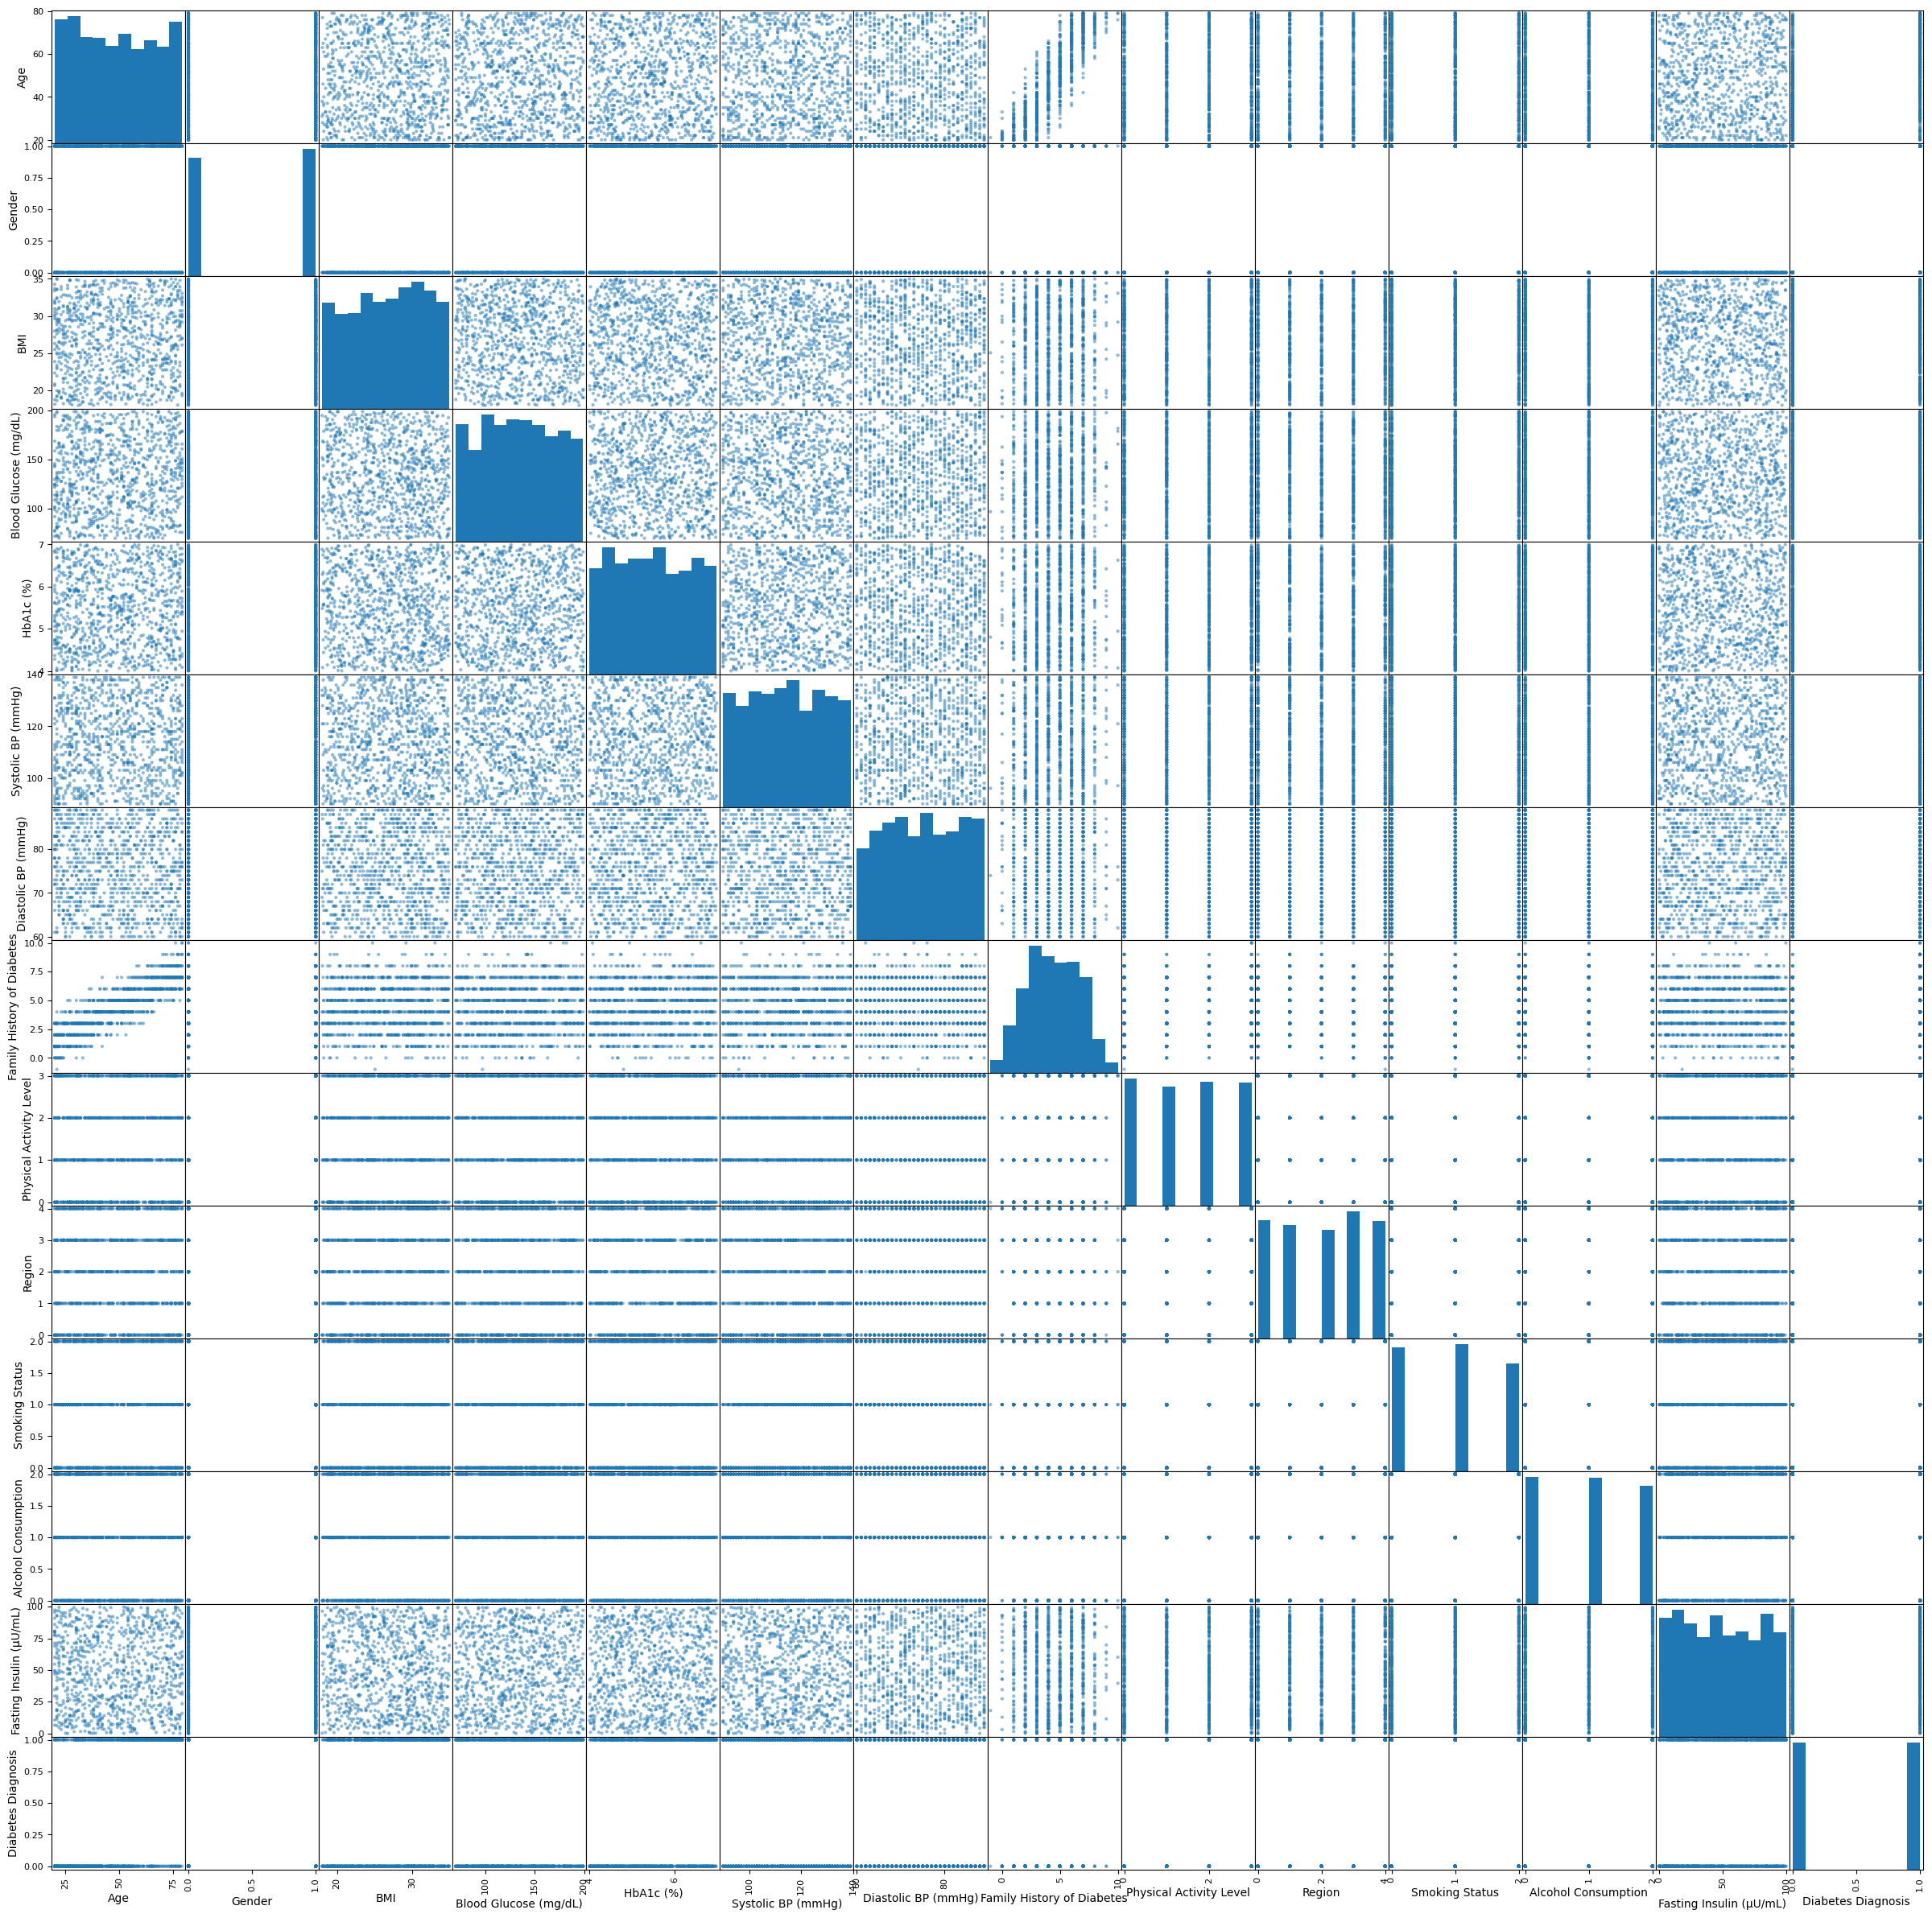

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(data,figsize=(30,30));
# we can come to various conclusion looking at these plots.

<Axes: >

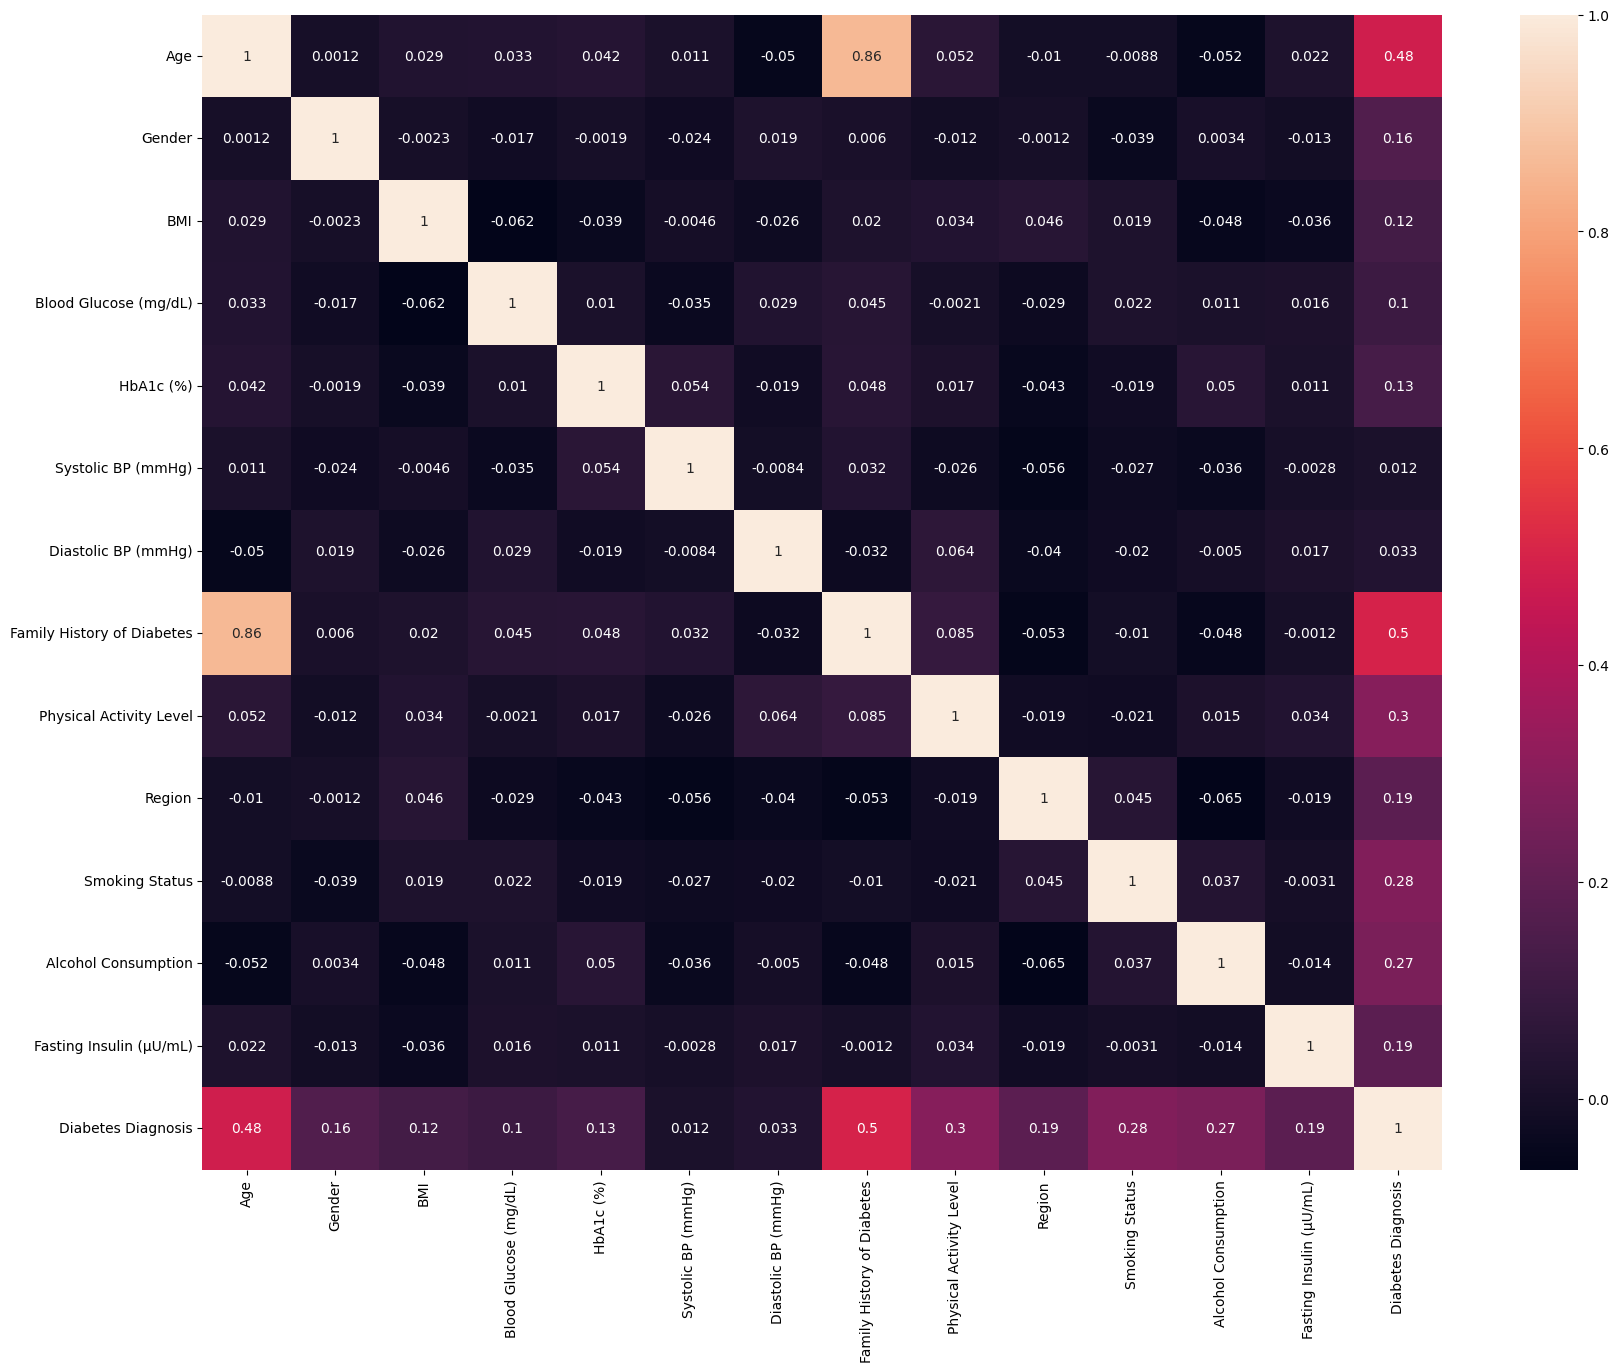

In [ ]:
import pandas as pd


corrmat = data.corr()
plt.figure(figsize=(20, 15))  # Adjust the width and height as needed
sns.heatmap(corrmat, annot=True)

In [ ]:
# Split the dataset into features and target variable
X = data.drop('Diabetes Diagnosis', axis=1)
y = data['Diabetes Diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the preprocessing steps for numerical and categorical data
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'int64']).columns

# Assuming all categorical features are now numerical (encoded)
# We will use OneHotEncoder for these features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Use most frequent value to fill missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Transform the data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

So for each model we will do the following steps:

Step 2: Model Selection and Training

Step 3: Hyperparameter Tuning

Step 4: Model Evaluation

Step 5: Model Validation

2.1 Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score

# Define the model for Logistic Regression
logreg_model = LogisticRegression(random_state=42, solver='liblinear')

# Define the hyperparameters to tune for Logistic Regression
logreg_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']  # Regularization term
}

# Perform grid search for hyperparameter tuning for Logistic Regression
logreg_grid_search = GridSearchCV(estimator=logreg_model, param_grid=logreg_param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
logreg_grid_search.fit(X_train_processed, y_train)

# Get the best parameters for Logistic Regression
logreg_best_params = logreg_grid_search.best_params_
print("Best Logistic Regression Parameters: ", logreg_best_params)

# Train the Logistic Regression model with the best parameters
logreg_best_model = LogisticRegression(random_state=42, solver='liblinear', **logreg_best_params)
logreg_best_model.fit(X_train_processed, y_train)

# Evaluate the Logistic Regression model on the testing data
logreg_y_pred = logreg_best_model.predict(X_test_processed)
print(classification_report(y_test, logreg_y_pred))

# Calculate AUC-ROC score for Logistic Regression
logreg_roc_auc = roc_auc_score(y_test, logreg_best_model.predict_proba(X_test_processed)[:, 1])
print("Logistic Regression AUC-ROC Score: ", logreg_roc_auc)

# Perform cross-validation for Logistic Regression
logreg_scores = cross_val_score(logreg_best_model, X_train_processed, y_train, cv=5, scoring='roc_auc')
print("Logistic Regression Cross-Validation AUC-ROC Scores: ", logreg_scores)
print("Mean Logistic Regression AUC-ROC Score: ", logreg_scores.mean())

Best Logistic Regression Parameters:  {'C': 1, 'penalty': 'l1'}
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        95
           1       1.00      0.95      0.98       105

    accuracy                           0.97       200
   macro avg       0.97      0.98      0.97       200
weighted avg       0.98      0.97      0.98       200

Logistic Regression AUC-ROC Score:  0.9984962406015038
Logistic Regression Cross-Validation AUC-ROC Scores:  [0.99468667 0.99484294 0.99781216 0.99796843 0.99578059]
Mean Logistic Regression AUC-ROC Score:  0.9962181590873573


2.2 Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score

# Define the model for Decision Trees
dt_model = DecisionTreeClassifier(random_state=42)

# Define the hyperparameters to tune for Decision Trees
dt_param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Perform grid search for hyperparameter tuning for Decision Trees
dt_grid_search = GridSearchCV(estimator=dt_model, param_grid=dt_param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
dt_grid_search.fit(X_train_processed, y_train)

# Get the best parameters for Decision Trees
dt_best_params = dt_grid_search.best_params_
print("Best Decision Trees Parameters: ", dt_best_params)

# Train the Decision Trees model with the best parameters
dt_best_model = DecisionTreeClassifier(random_state=42, **dt_best_params)
dt_best_model.fit(X_train_processed, y_train)

# Evaluate the Decision Trees model on the testing data
dt_y_pred = dt_best_model.predict(X_test_processed)
print(classification_report(y_test, dt_y_pred))

# Calculate AUC-ROC score for Decision Trees
dt_roc_auc = roc_auc_score(y_test, dt_best_model.predict_proba(X_test_processed)[:, 1])
print("Decision Trees AUC-ROC Score: ", dt_roc_auc)

# Perform cross-validation for Decision Trees
dt_scores = cross_val_score(dt_best_model, X_train_processed, y_train, cv=5, scoring='roc_auc')
print("Decision Trees Cross-Validation AUC-ROC Scores: ", dt_scores)
print("Mean Decision Trees AUC-ROC Score: ", dt_scores.mean())

Best Decision Trees Parameters:  {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.76      0.85      0.81        95
           1       0.85      0.76      0.80       105

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.80       200
weighted avg       0.81      0.81      0.80       200

Decision Trees AUC-ROC Score:  0.8475689223057645
Decision Trees Cross-Validation AUC-ROC Scores:  [0.84411627 0.76215034 0.79137365 0.81270511 0.873574  ]
Mean Decision Trees AUC-ROC Score:  0.8167838724800749


2.3 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score

# Define the model for Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Define the hyperparameters to tune for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search for hyperparameter tuning for Random Forest
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
rf_grid_search.fit(X_train_processed, y_train)

# Get the best parameters for Random Forest
rf_best_params = rf_grid_search.best_params_
print("Best Random Forest Parameters: ", rf_best_params)

# Train the Random Forest model with the best parameters
rf_best_model = RandomForestClassifier(random_state=42, **rf_best_params)
rf_best_model.fit(X_train_processed, y_train)

# Evaluate the Random Forest model on the testing data
rf_y_pred = rf_best_model.predict(X_test_processed)
print(classification_report(y_test, rf_y_pred))

# Calculate AUC-ROC score for Random Forest
rf_roc_auc = roc_auc_score(y_test, rf_best_model.predict_proba(X_test_processed)[:, 1])
print("Random Forest AUC-ROC Score: ", rf_roc_auc)

# Perform cross-validation for Random Forest
rf_scores = cross_val_score(rf_best_model, X_train_processed, y_train, cv=5, scoring='roc_auc')
print("Random Forest Cross-Validation AUC-ROC Scores: ", rf_scores)
print("Mean Random Forest AUC-ROC Score: ", rf_scores.mean())

Best Random Forest Parameters:  {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.85      0.94      0.89        95
           1       0.94      0.85      0.89       105

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.89      0.89       200

Random Forest AUC-ROC Score:  0.9645112781954888
Random Forest Cross-Validation AUC-ROC Scores:  [0.95764963 0.93811533 0.95561807 0.95796218 0.97905923]
Mean Random Forest AUC-ROC Score:  0.9576808876386934


2.4 Support Vector Machines

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score

# Define the model for Support Vector Machines
svm_model = SVC(random_state=42, probability=True)

# Define the hyperparameters to tune for Support Vector Machines
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Perform grid search for hyperparameter tuning for Support Vector Machines
svm_grid_search = GridSearchCV(estimator=svm_model, param_grid=svm_param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
svm_grid_search.fit(X_train_processed, y_train)

# Get the best parameters for Support Vector Machines
svm_best_params = svm_grid_search.best_params_
print("Best Support Vector Machines Parameters: ", svm_best_params)

# Train the Support Vector Machines model with the best parameters
svm_best_model = SVC(random_state=42, probability=True, **svm_best_params)
svm_best_model.fit(X_train_processed, y_train)

# Evaluate the Support Vector Machines model on the testing data
svm_y_pred = svm_best_model.predict(X_test_processed)
print(classification_report(y_test, svm_y_pred))

# Calculate AUC-ROC score for Support Vector Machines
svm_roc_auc = roc_auc_score(y_test, svm_best_model.predict_proba(X_test_processed)[:, 1])
print("Support Vector Machines AUC-ROC Score: ", svm_roc_auc)

# Perform cross-validation for Support Vector Machines
svm_scores = cross_val_score(svm_best_model, X_train_processed, y_train, cv=5, scoring='roc_auc')
print("Support Vector Machines Cross-Validation AUC-ROC Scores: ", svm_scores)
print("Mean Support Vector Machines AUC-ROC Score: ", svm_scores.mean())

Best Support Vector Machines Parameters:  {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        95
           1       0.97      0.95      0.96       105

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200

Support Vector Machines AUC-ROC Score:  0.993483709273183
Support Vector Machines Cross-Validation AUC-ROC Scores:  [0.99374902 0.99312393 0.99515549 0.99281138 0.99374902]
Mean Support Vector Machines AUC-ROC Score:  0.9937177684013125


2.5 K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score

# Define the model for K-Nearest Neighbors
knn_model = KNeighborsClassifier()

# Define the hyperparameters to tune for K-Nearest Neighbors
knn_param_grid = {
    'n_neighbors': list(range(1, 31)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Perform grid search for hyperparameter tuning for K-Nearest Neighbors
knn_grid_search = GridSearchCV(estimator=knn_model, param_grid=knn_param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
knn_grid_search.fit(X_train_processed, y_train)

# Get the best parameters for K-Nearest Neighbors
knn_best_params = knn_grid_search.best_params_
print("Best K-Nearest Neighbors Parameters: ", knn_best_params)

# Train the K-Nearest Neighbors model with the best parameters
knn_best_model = KNeighborsClassifier(**knn_best_params)
knn_best_model.fit(X_train_processed, y_train)

# Evaluate the K-Nearest Neighbors model on the testing data
knn_y_pred = knn_best_model.predict(X_test_processed)
print(classification_report(y_test, knn_y_pred))

# Calculate AUC-ROC score for K-Nearest Neighbors
knn_roc_auc = roc_auc_score(y_test, knn_best_model.predict_proba(X_test_processed)[:, 1])
print("K-Nearest Neighbors AUC-ROC Score: ", knn_roc_auc)

# Perform cross-validation for K-Nearest Neighbors
knn_scores = cross_val_score(knn_best_model, X_train_processed, y_train, cv=5, scoring='roc_auc')
print("K-Nearest Neighbors Cross-Validation AUC-ROC Scores: ", knn_scores)
print("Mean K-Nearest Neighbors AUC-ROC Score: ", knn_scores.mean())

Best K-Nearest Neighbors Parameters:  {'metric': 'euclidean', 'n_neighbors': 30, 'weights': 'distance'}
              precision    recall  f1-score   support

           0       0.89      0.96      0.92        95
           1       0.96      0.90      0.93       105

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.92       200
weighted avg       0.93      0.93      0.93       200

K-Nearest Neighbors AUC-ROC Score:  0.9813533834586468
K-Nearest Neighbors Cross-Validation AUC-ROC Scores:  [0.96827629 0.96140022 0.97077668 0.94733552 0.97796531]
Mean K-Nearest Neighbors AUC-ROC Score:  0.965150804813252


2.6 Artificial Neural Networks

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score

# Define the model for Artificial Neural Networks
ann_model = MLPClassifier(random_state=42)

# Define the hyperparameters to tune for Artificial Neural Networks
ann_param_grid = {
    'hidden_layer_sizes': [(10,), (50,), (100,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

# Perform grid search for hyperparameter tuning for Artificial Neural Networks
ann_grid_search = GridSearchCV(estimator=ann_model, param_grid=ann_param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
ann_grid_search.fit(X_train_processed, y_train)

# Get the best parameters for Artificial Neural Networks
ann_best_params = ann_grid_search.best_params_
print("Best Artificial Neural Networks Parameters: ", ann_best_params)

# Train the Artificial Neural Networks model with the best parameters
ann_best_model = MLPClassifier(random_state=42, **ann_best_params)
ann_best_model.fit(X_train_processed, y_train)

# Evaluate the Artificial Neural Networks model on the testing data
ann_y_pred = ann_best_model.predict(X_test_processed)
print(classification_report(y_test, ann_y_pred))

# Calculate AUC-ROC score for Artificial Neural Networks
ann_roc_auc = roc_auc_score(y_test, ann_best_model.predict_proba(X_test_processed)[:, 1])
print("Artificial Neural Networks AUC-ROC Score: ", ann_roc_auc)

# Perform cross-validation for Artificial Neural Networks
ann_scores = cross_val_score(ann_best_model, X_train_processed, y_train, cv=5, scoring='roc_auc')
print("Artificial Neural Networks Cross-Validation AUC-ROC Scores: ", ann_scores)
print("Mean Artificial Neural Networks AUC-ROC Score: ", ann_scores.mean())

Best Artificial Neural Networks Parameters:  {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.1}
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        95
           1       0.96      0.94      0.95       105

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200

Artificial Neural Networks AUC-ROC Score:  0.9933834586466166
Artificial Neural Networks Cross-Validation AUC-ROC Scores:  [0.9945304  0.99749961 0.99749961 0.99359275 0.98999844]
Mean Artificial Neural Networks AUC-ROC Score:  0.9946241600250041


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Define the model for Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)

# Define the hyperparameters to tune for Gradient Boosting
gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7]
}

# Perform grid search for hyperparameter tuning for Gradient Boosting
gb_grid_search = GridSearchCV(estimator=gb_model, param_grid=gb_param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
gb_grid_search.fit(X_train_processed, y_train)

# Get the best parameters for Gradient Boosting
gb_best_params = gb_grid_search.best_params_
print("Best Gradient Boosting Parameters: ", gb_best_params)

# Train the Gradient Boosting model with the best parameters
gb_best_model = GradientBoostingClassifier(random_state=42, **gb_best_params)
gb_best_model.fit(X_train_processed, y_train)

# Evaluate the Gradient Boosting model on the testing data
gb_y_pred = gb_best_model.predict(X_test_processed)
print(classification_report(y_test, gb_y_pred))

# Calculate AUC-ROC score for Gradient Boosting
gb_roc_auc = roc_auc_score(y_test, gb_best_model.predict_proba(X_test_processed)[:, 1])
print("Gradient Boosting AUC-ROC Score: ", gb_roc_auc)

# Perform cross-validation for Gradient Boosting
gb_scores = cross_val_score(gb_best_model, X_train_processed, y_train, cv=5, scoring='roc_auc')
print("Gradient Boosting Cross-Validation AUC-ROC Scores: ", gb_scores)
print("Mean Gradient Boosting AUC-ROC Score: ", gb_scores.mean())

Best Gradient Boosting Parameters:  {'learning_rate': 1, 'max_depth': 3, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.87      0.92      0.89        95
           1       0.92      0.88      0.90       105

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.89       200
weighted avg       0.90      0.90      0.90       200

Gradient Boosting AUC-ROC Score:  0.9764411027568923
Gradient Boosting Cross-Validation AUC-ROC Scores:  [0.9792155  0.96468198 0.98249727 0.96593218 0.97671511]
Mean Gradient Boosting AUC-ROC Score:  0.9738084075636818
